# <center> EDA </center>

##### <i> En el EDA, llevamos a cabo un <b>análisis exploratorio</b> de los datos que han sido previamente procesados en el ETL. El objetivo es comprender las interacciones y conexiones entre las variables disponibles, lo que nos permitirá preparar los datos de manera adecuada para su uso en la construcción de modelos de <b>machine learning</b>.

## Librerías

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import funciones

sns.set_style("white")
import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extracción de datos limpios del archivo

In [38]:
df = pd.read_csv('data\BBDD_hospitalizacion_ETL.csv')

In [39]:
df

,EDAD,DIABETES,HOSPIT_ULTIMO_MES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,CUP,ENF_CRONICA_PUL_OBST,BIOPSIA,NUM_DIAS_INFECCIOSA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION,DIAS_HOSP_MQ,DIAS_HOSP_UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


## Observamos de manera separada las Variables Numericas y las Variables Categoricas

## - Variables Numericas

In [40]:
#Numericas
df.describe()

,EDAD,PSA,NUM_MUESTRAS,NUM_DIAS_INFECCIOSA,DIAS_HOSP_MQ,DIAS_HOSP_UPC
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


### se observa un valor muy alto en edad, por lo que se limita a 100

In [41]:
# se observa que la edad max es muy alta
df = df[df['EDAD']<100]
df

,EDAD,DIABETES,HOSPIT_ULTIMO_MES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,CUP,ENF_CRONICA_PUL_OBST,BIOPSIA,NUM_DIAS_INFECCIOSA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION,DIAS_HOSP_MQ,DIAS_HOSP_UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [42]:
df['EDAD'].describe()

count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: EDAD, dtype: float64

### columna 'DIAS HOSPITALIZACIÓN UPC'

In [43]:
conteo=df['DIAS_HOSP_UPC'].value_counts()
conteo

DIAS_HOSP_UPC
0    428
3      2
2      1
Name: count, dtype: int64

In [44]:
porcentaje_valores = (conteo/ len(df)) * 100
porcentaje_valores

DIAS_HOSP_UPC
0    99.303944
3     0.464037
2     0.232019
Name: count, dtype: float64

Al encontrar un alto valor en 0 (no hospitalizado) se decide eliminar esa columna ya que no se considera necesaria para la posterior toma de decisiones

In [45]:
df = df.drop(columns=['DIAS_HOSP_UPC'])
df.columns

Index(['EDAD', 'DIABETES', 'HOSPIT_ULTIMO_MES', 'PSA', 'BIOPSIAS_PREVIAS',
       'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS',
       'CUP', 'ENF_CRONICA_PUL_OBST', 'BIOPSIA', 'NUM_DIAS_INFECCIOSA',
       'FIEBRE', 'ITU', 'TPO_CULTIVO', 'AGENTE_AISLADO', 'PATRON_RESISTENCIA',
       'HOSPITALIZACION', 'DIAS_HOSP_MQ'],
      dtype='object')

### Columna 'DIAS HOSPITALIZACION MQ'

In [46]:
conteo1=df['DIAS_HOSP_MQ'].value_counts()
conteo

DIAS_HOSP_UPC
0    428
3      2
2      1
Name: count, dtype: int64

In [47]:
porcentaje_valores1 = (conteo1/ len(df)) * 100
porcentaje_valores1

DIAS_HOSP_MQ
0     94.663573
2      1.856148
4      1.392111
3      0.928074
5      0.696056
12     0.464037
Name: count, dtype: float64

se decide eliminar esta columna por el mismo motivo, no influye en la toma de decisiones si hospitalizarlo o no.

In [48]:
df = df.drop(columns=['DIAS_HOSP_MQ'])
df.columns

Index(['EDAD', 'DIABETES', 'HOSPIT_ULTIMO_MES', 'PSA', 'BIOPSIAS_PREVIAS',
       'VOLUMEN_PROSTATICO', 'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS',
       'CUP', 'ENF_CRONICA_PUL_OBST', 'BIOPSIA', 'NUM_DIAS_INFECCIOSA',
       'FIEBRE', 'ITU', 'TPO_CULTIVO', 'AGENTE_AISLADO', 'PATRON_RESISTENCIA',
       'HOSPITALIZACION'],
      dtype='object')

## - Variables categóricas

In [49]:
df.describe(include='object')

,DIABETES,HOSPIT_ULTIMO_MES,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,CUP,ENF_CRONICA_PUL_OBST,BIOPSIA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION
count,431,431,431,431,431,431,431,431,431,431,431,431,431,431
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,380,427,387,306,344,428,417,211,395,425,423,423,424,408


VISUALIZACIÓN DE LA VARIABLE DIABETES


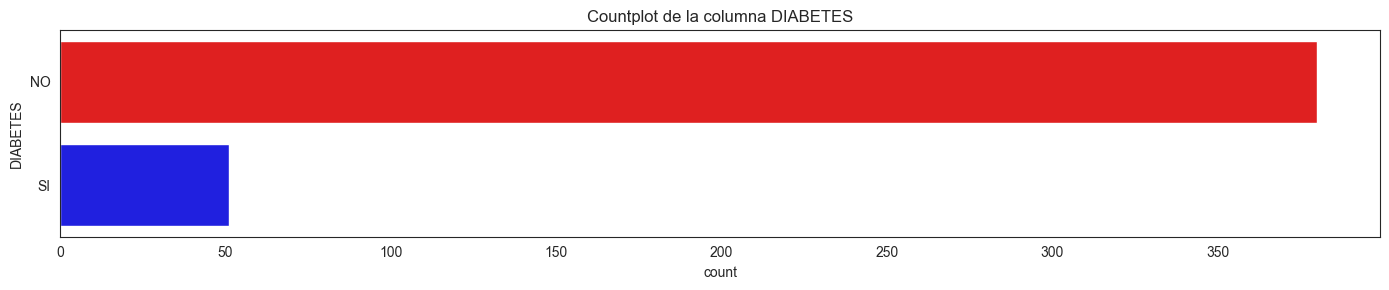

VISUALIZACIÓN DE LA VARIABLE HOSPIT_ULTIMO_MES


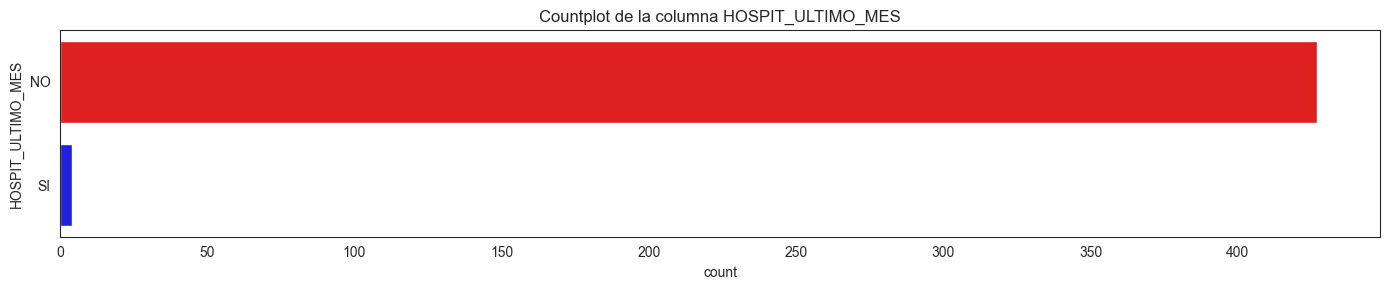

VISUALIZACIÓN DE LA VARIABLE BIOPSIAS_PREVIAS


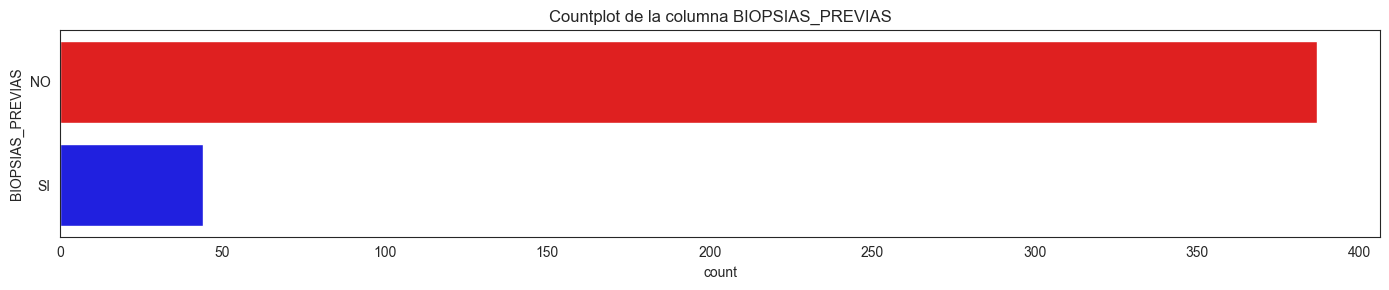

VISUALIZACIÓN DE LA VARIABLE VOLUMEN_PROSTATICO


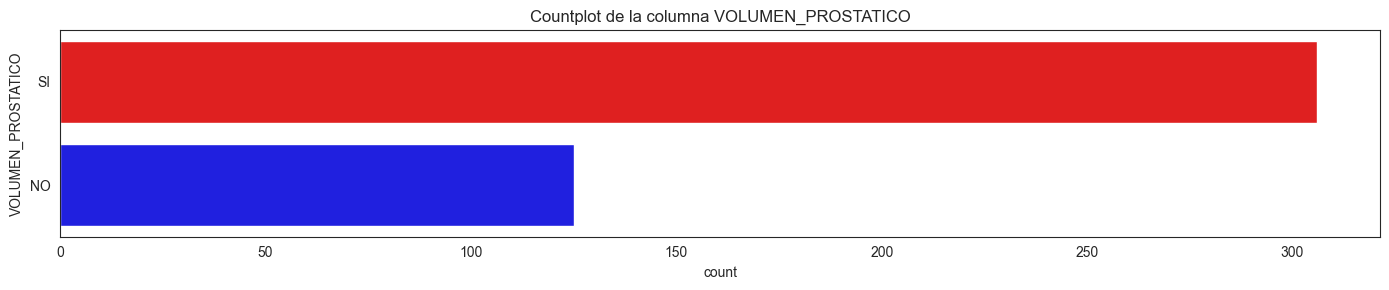

VISUALIZACIÓN DE LA VARIABLE ANTIBIOTICO_EN_PROFILAXIS


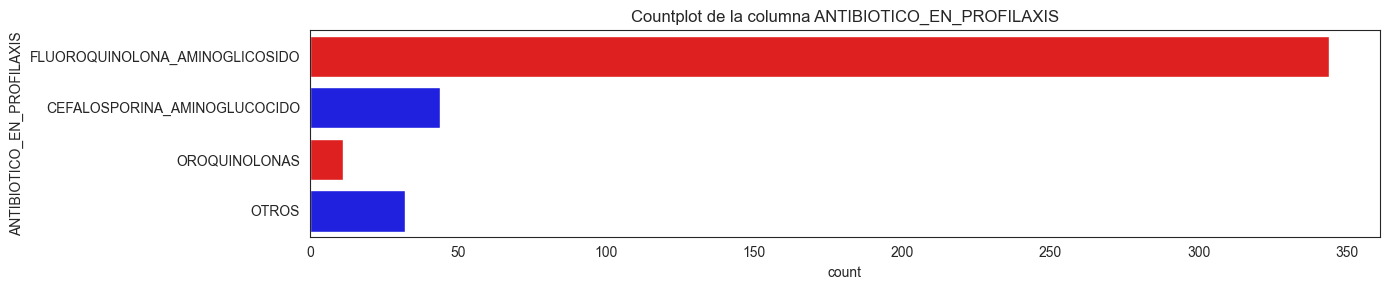

VISUALIZACIÓN DE LA VARIABLE CUP


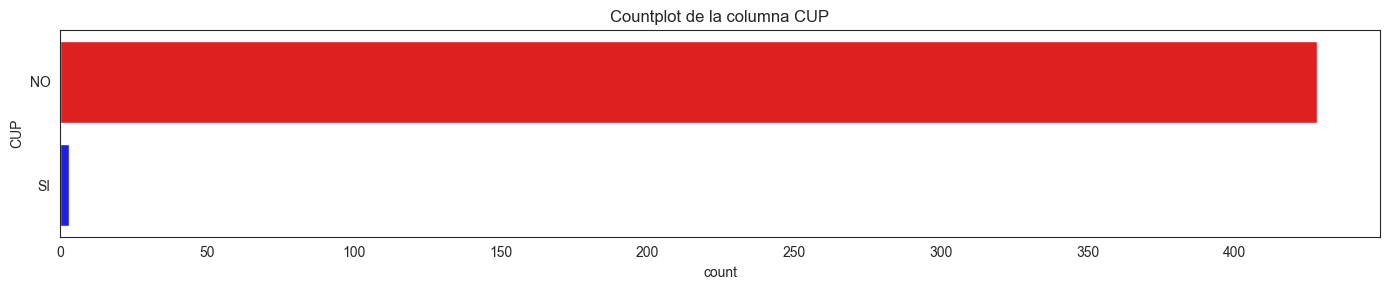

VISUALIZACIÓN DE LA VARIABLE ENF_CRONICA_PUL_OBST


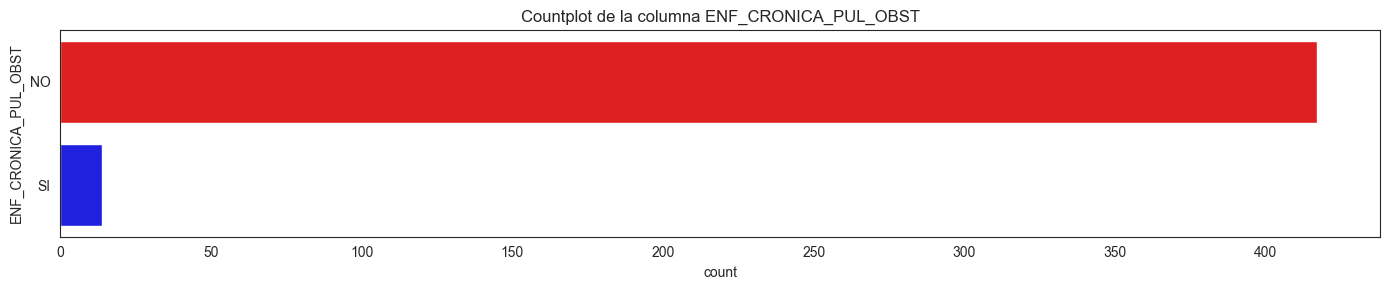

VISUALIZACIÓN DE LA VARIABLE BIOPSIA


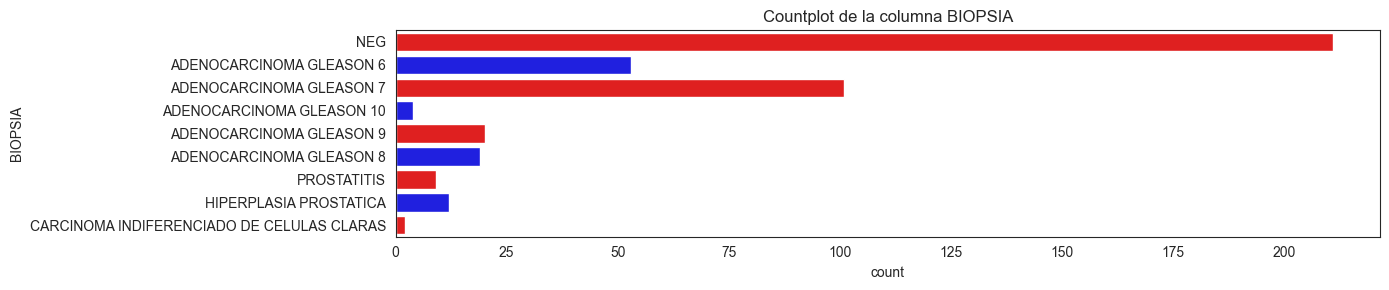

VISUALIZACIÓN DE LA VARIABLE FIEBRE


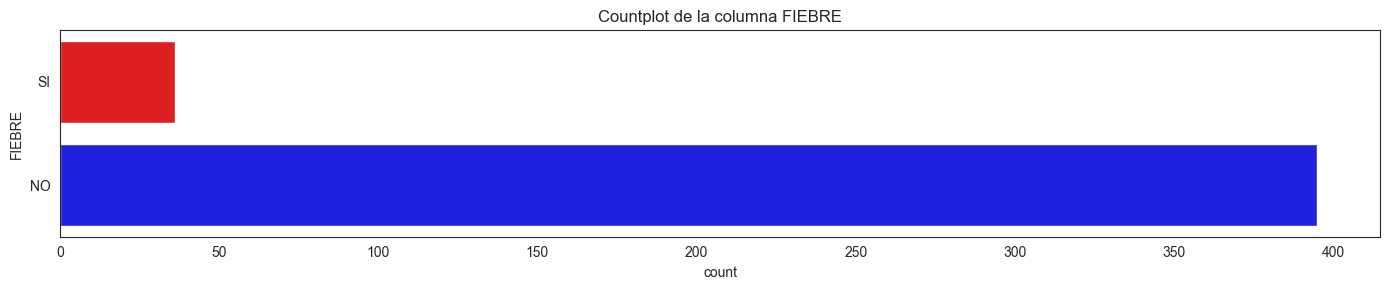

VISUALIZACIÓN DE LA VARIABLE ITU


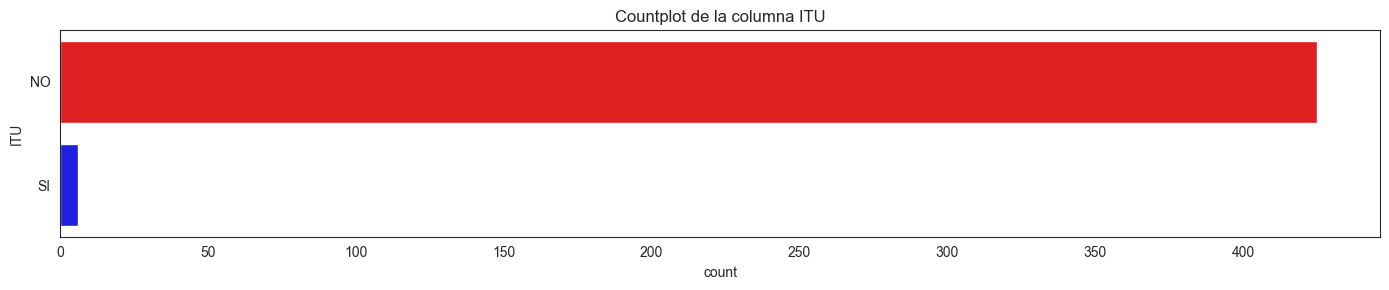

VISUALIZACIÓN DE LA VARIABLE TPO_CULTIVO


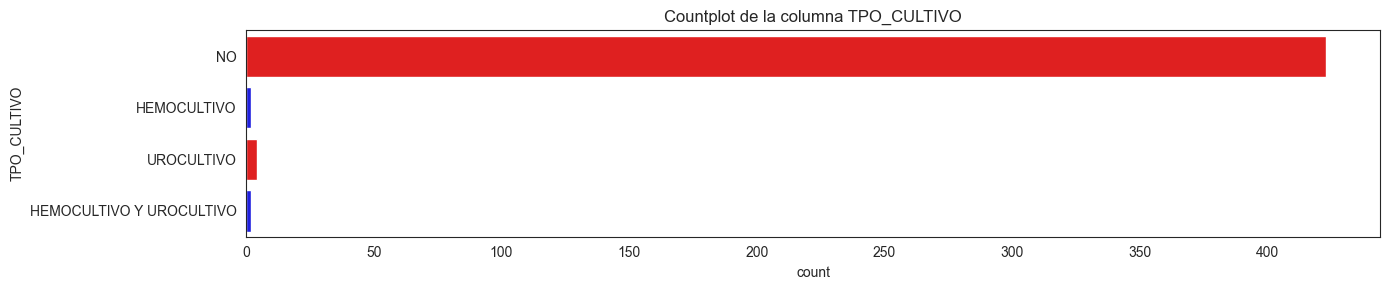

VISUALIZACIÓN DE LA VARIABLE AGENTE_AISLADO


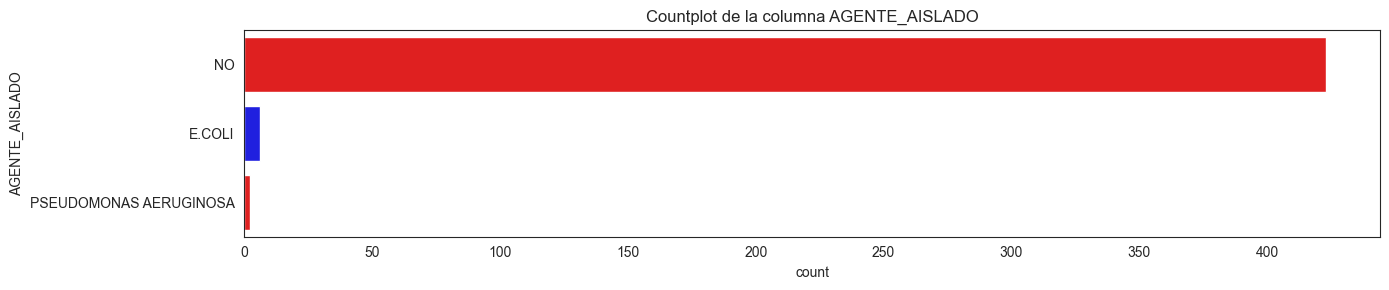

VISUALIZACIÓN DE LA VARIABLE PATRON_RESISTENCIA


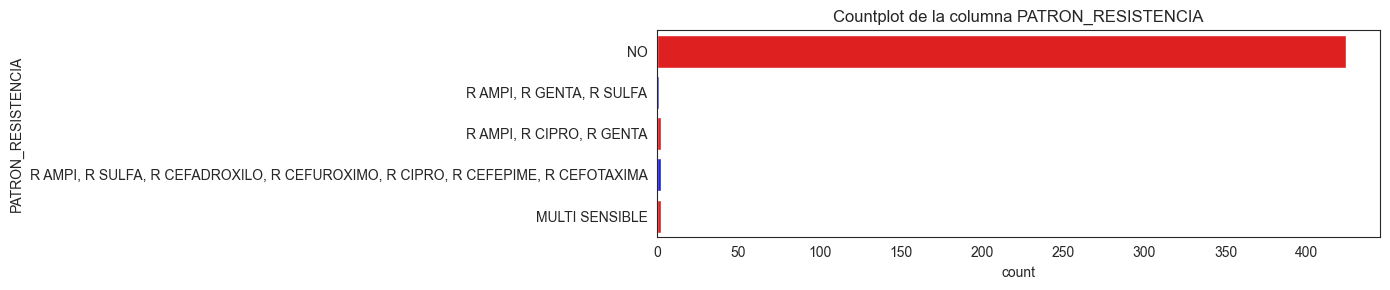

VISUALIZACIÓN DE LA VARIABLE HOSPITALIZACION


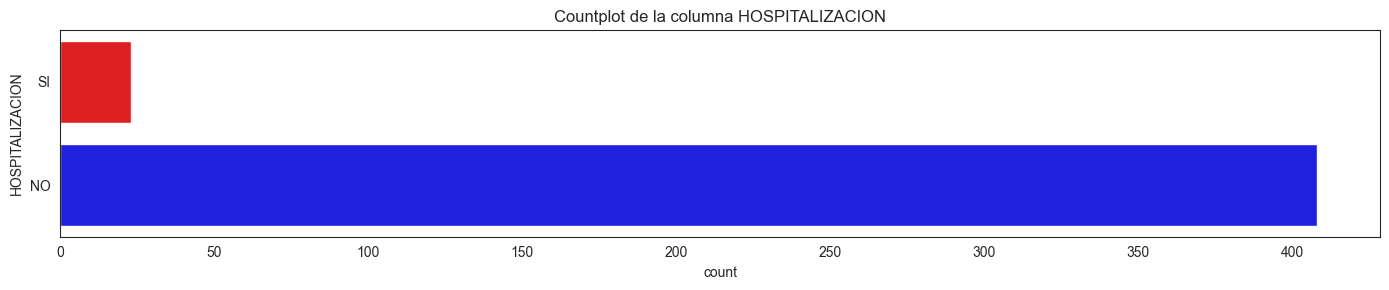

In [50]:
columnas = ['DIABETES',	'HOSPIT_ULTIMO_MES', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO',	'ANTIBIOTICO_EN_PROFILAXIS', 'CUP',	'ENF_CRONICA_PUL_OBST',	'BIOPSIA',	'FIEBRE',	'ITU',	'TPO_CULTIVO',	'AGENTE_AISLADO',	'PATRON_RESISTENCIA',	'HOSPITALIZACION']

for c in columnas:
    print(f'VISUALIZACIÓN DE LA VARIABLE {c}')
    funciones.countplot(df, c)

-----

## CONCLUSION DE LO OBSERVADO

- 'DIABETES':                  la gran mayoria es  'NO'
- 'HOSPIT_ULTIMO_MES':         la gran mayoria es  'NO'
- 'BIOPSIAS_PREVIAS':          la gran mayoria es  'NO'
- 'VOLUMEN_PROSTATICO':        la gran mayoria es  'SI'
- 'ANTIBIOTICO_EN_PROFILAXIS': consta de 4 categorias, y 'FLUOROQUINOLONA_AMINOGLICOSIDO' es la mayor
- 'CUP':                        la gran mayoria es  'NO'	
- 'ENF_CRONICA_PUL_OBST':       la gran mayoria es  'NO'	
- 'BIOPSIA':                    de 9 categorias, se concentra mas en 'NEG'		
- 'FIEBRE':                     la gran mayoria es  'NO'
- 'ITU':                        la gran mayoria es  'NO'
- 'TPO_CULTIVO':                la gran mayoria es  'NO', de 4 categorias
- 'AGENTE_AISLADO':             la gran mayoria es  'NO', de 3 categorias
- 'PATRON_RESISTENCIA':         la gran mayoria es  'NO', de 5 categorias
- 'HOSPITALIZACION':            la gran mayoria es  'NO'

-----

En el siguiente heatmap se puede apreciar de manera resumida el porcentaje de datos por cada una de las variables (eje y) y categorías de dichas variables (eje x). Se hace para evaluar si algunas de las variables es constante. En este caso se adopta como variable constante aquellas variables donde una de sus categorías superen el 99% de etiquetas de la misma categoría. Se adopta 99% porque la variable objetivo presenta cerca del 95% de las categorías con una sola clase y se busca eliminar variables con mayor cantidad de valores constantes.

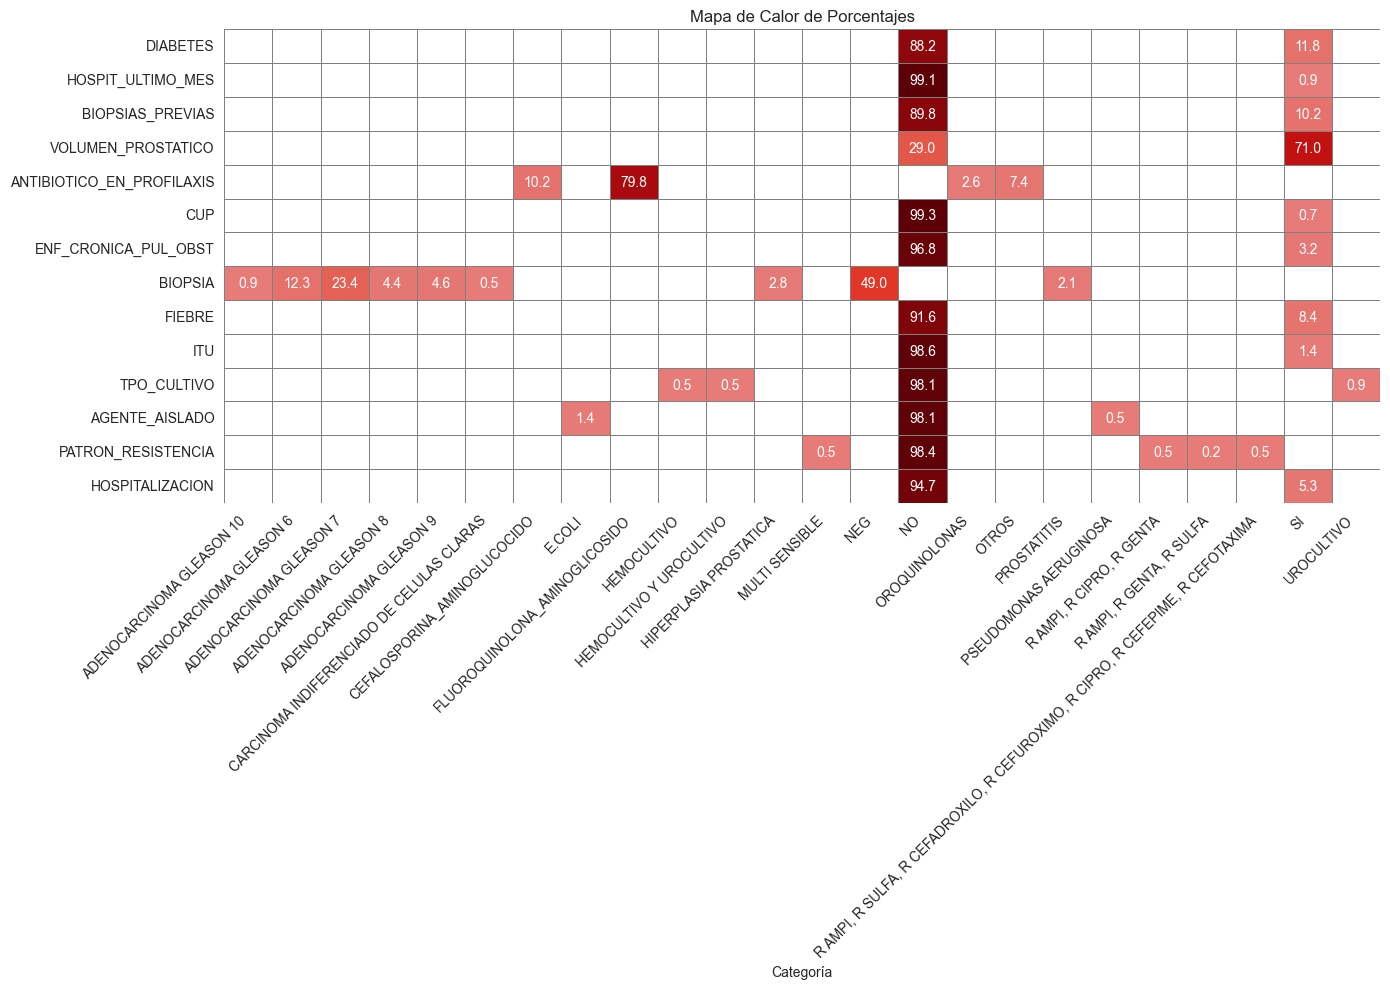

In [51]:
funciones.heatmap_categoricas(df)  

Se observa que hospitalizacion y cup la mayoria supera el 99% por lo que no nos sirve, y eliminamos esas columnas

In [52]:
df = df.drop(columns=['HOSPIT_ULTIMO_MES'])	
df = df.drop(columns=['CUP'])

In [53]:
df

,EDAD,DIABETES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,ENF_CRONICA_PUL_OBST,BIOPSIA,NUM_DIAS_INFECCIOSA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION
0,53,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI
3,56,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO
429,70,SI,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,0,NO,NO,NO,NO,NO,NO
430,75,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO
431,67,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO


## Se guarda el archivo analizado (EDA)


In [62]:
hospital_EDA = 'data\BBDD_hospitalizacion_EDA.csv'
df.to_csv(hospital_EDA, index=False, encoding='utf-8')
print(f'Se guardó el archivo {hospital_EDA}')

Se guardó el archivo data\BBDD_hospitalizacion_EDA.csv


____________
_______________

### Una vez terminado, ahora procedemos a transformar las variables categóricas en forma numérica, que puedan ser interpretados por los modelos de Machine Learning. 


In [55]:
df_codif = funciones.label_encode_categoricals(df)
df_codif

,EDAD,DIABETES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,ENF_CRONICA_PUL_OBST,BIOPSIA,NUM_DIAS_INFECCIOSA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,1,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,1,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,3,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,1,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,1,0
429,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,1,0
430,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,1,0
431,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,1,0


## Correlación
Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

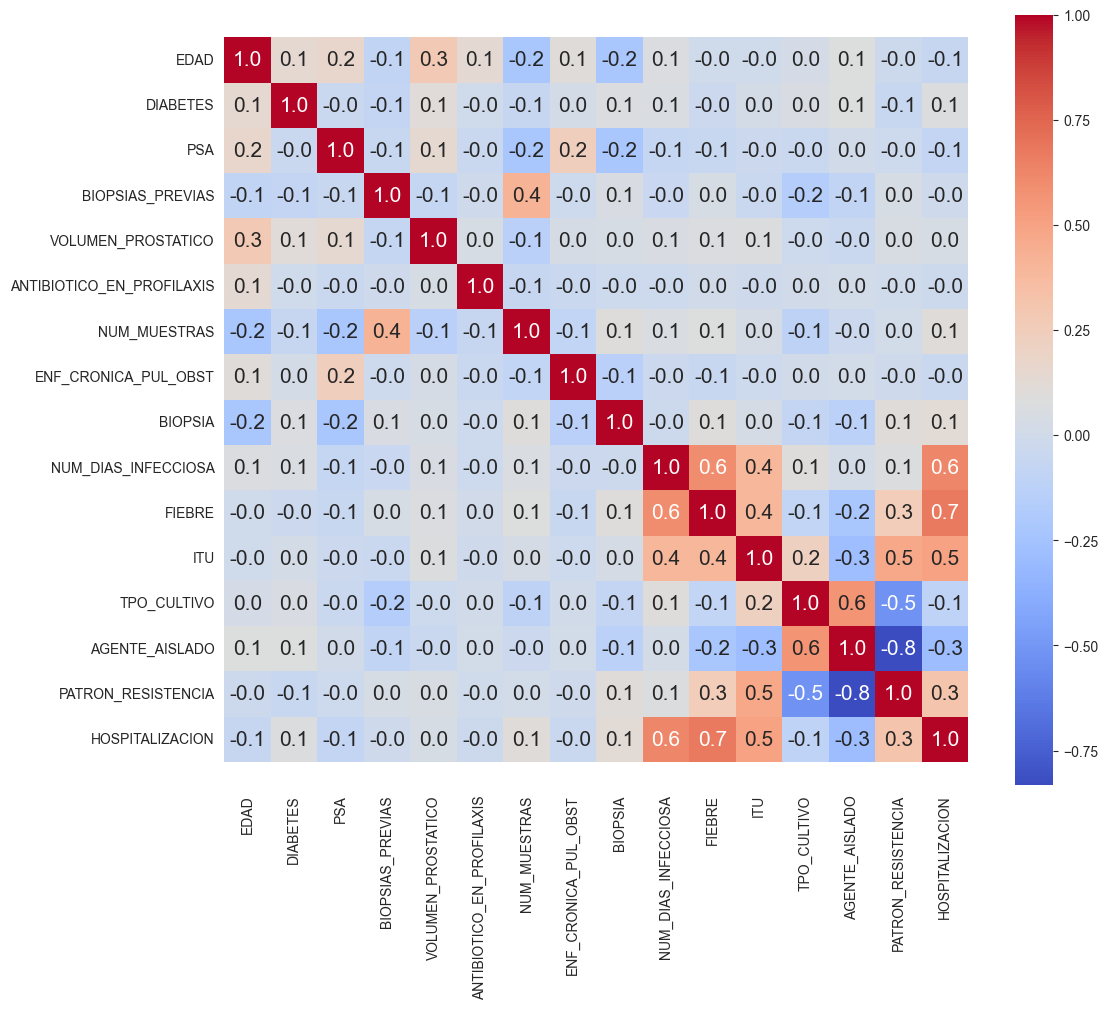

In [56]:
# Calcula la correlación
corr = df_codif.corr()
# Grafica la correlación
funciones.plot_corre_heatmap(corr)

De la matriz se observa que FIEBRE y NUM_DIAS_INFECCIOSA tienen alta correlación lineal entre si y con la variable objetivo HOSPITALIZACION.
 Se decide eliminar NUM_DIAS_INFECCIOSA dado que FIEBRE es una variable fácil de medir.

También se observa una relación bastante fuerte entre AGENTE_AISLADO con TIPO CULTIVO y con PATRON_RESISTENCIA, por lo que se decide eliminar AGENTE_AISLADO y PATRON_RESISTENCIA.

In [57]:
df_codif

,EDAD,DIABETES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,ENF_CRONICA_PUL_OBST,BIOPSIA,NUM_DIAS_INFECCIOSA,FIEBRE,ITU,TPO_CULTIVO,AGENTE_AISLADO,PATRON_RESISTENCIA,HOSPITALIZACION
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,1,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,1,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,3,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,1,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,1,0
429,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,1,0
430,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,1,0
431,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,1,0


In [58]:
columnas_a_eliminar = ['NUM_DIAS_INFECCIOSA', 'AGENTE_AISLADO', 'PATRON_RESISTENCIA']

df = df.drop(columns=columnas_a_eliminar)

df.columns, df_codif.columns

(Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO',
        'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS', 'ENF_CRONICA_PUL_OBST',
        'BIOPSIA', 'FIEBRE', 'ITU', 'TPO_CULTIVO', 'HOSPITALIZACION'],
       dtype='object'),
 Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS_PREVIAS', 'VOLUMEN_PROSTATICO',
        'ANTIBIOTICO_EN_PROFILAXIS', 'NUM_MUESTRAS', 'ENF_CRONICA_PUL_OBST',
        'BIOPSIA', 'NUM_DIAS_INFECCIOSA', 'FIEBRE', 'ITU', 'TPO_CULTIVO',
        'AGENTE_AISLADO', 'PATRON_RESISTENCIA', 'HOSPITALIZACION'],
       dtype='object'))

In [59]:
columnas_a_eliminar = ['NUM_DIAS_INFECCIOSA', 'AGENTE_AISLADO', 'PATRON_RESISTENCIA']
df_codif = df_codif.drop(columns=columnas_a_eliminar)
df_codif

,EDAD,DIABETES,PSA,BIOPSIAS_PREVIAS,VOLUMEN_PROSTATICO,ANTIBIOTICO_EN_PROFILAXIS,NUM_MUESTRAS,ENF_CRONICA_PUL_OBST,BIOPSIA,FIEBRE,ITU,TPO_CULTIVO,HOSPITALIZACION
0,53,0,4.0,0,1,1,12,0,7,1,0,2,1
1,56,0,7.7,0,1,1,12,0,7,1,0,2,1
2,57,0,29.0,1,1,1,24,0,7,1,0,0,1
3,56,0,7.0,0,1,1,12,0,7,1,0,2,1
4,55,0,29.0,1,1,1,24,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,2,0
429,70,1,18.0,0,1,1,12,0,7,0,0,2,0
430,75,0,75.0,0,1,1,12,0,3,0,0,2,0
431,67,0,6.0,0,1,1,12,0,1,0,0,2,0


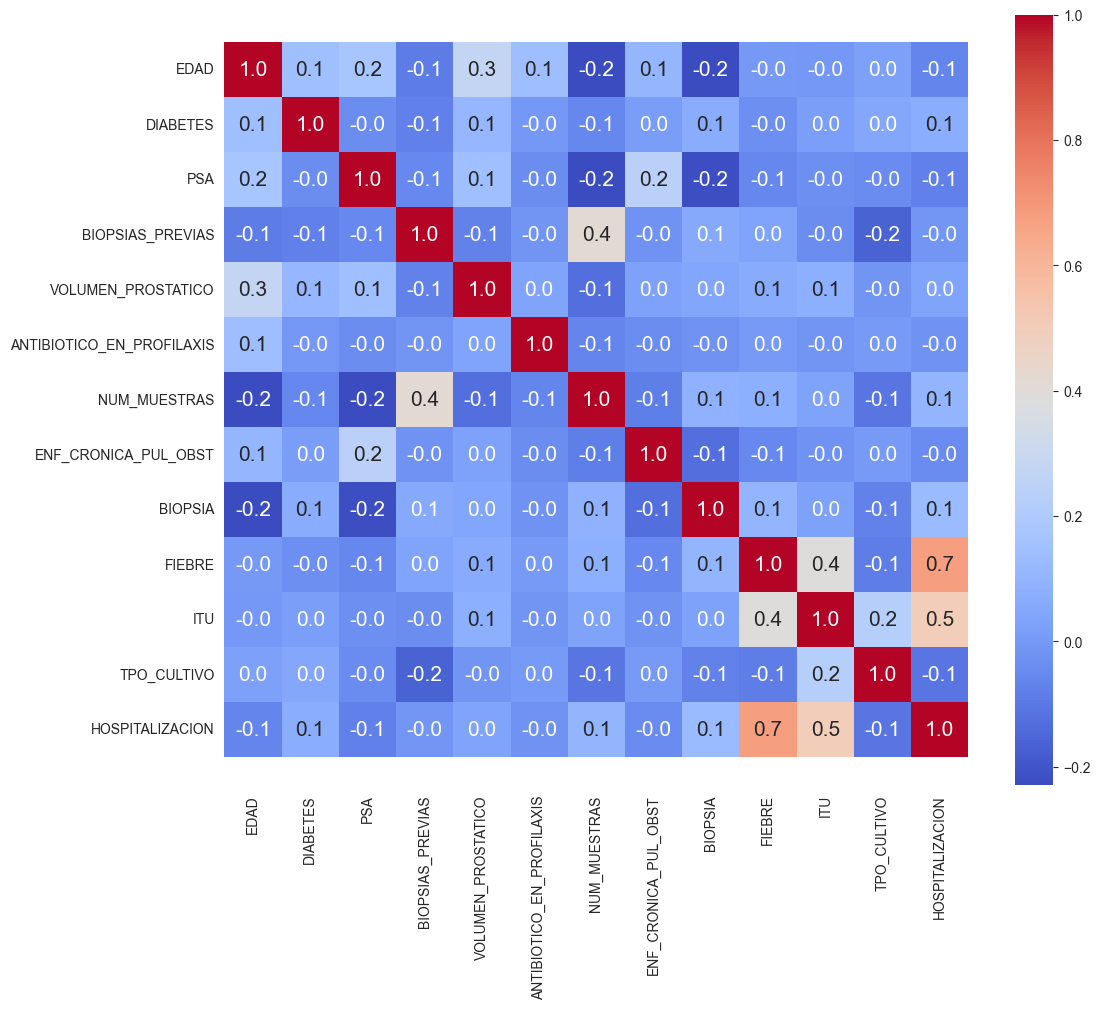

In [60]:
# Calcula la correlación
corr = df_codif.corr()
# Grafica la correlación
funciones.plot_corre_heatmap(corr)

## Terminado hasta aca lo guardamos en archivos csv

In [63]:
hospital_p_modelo = 'data\BBDD_hospitalizacion_p_modelo.csv'
df_codif.to_csv(hospital_p_modelo, index=False, encoding='utf-8')
print(f'Se guardó el archivo {hospital_p_modelo}')

Se guardó el archivo data\BBDD_hospitalizacion_p_modelo.csv
